/var/folders/gd/ldpql9k10fv2bcx8x9khqszc0000gn/T/ipykernel_28241/885482069.py:64: ComplexWarning: Casting complex values to real discards the imaginary part
  det_up[ind0, ind1, ind2] = dcoupout_up[ind0, 1, ind1, ind2] * np.conj(dcoupout_up[ind0, 1, ind1, ind2])
/var/folders/gd/ldpql9k10fv2bcx8x9khqszc0000gn/T/ipykernel_28241/885482069.py:65: ComplexWarning: Casting complex values to real discards the imaginary part
  det_down[ind0, ind1, ind2] = dcoupout_down[ind0, 1, ind1, ind2] * np.conj(dcoupout_down[ind0, 1, ind1, ind2])


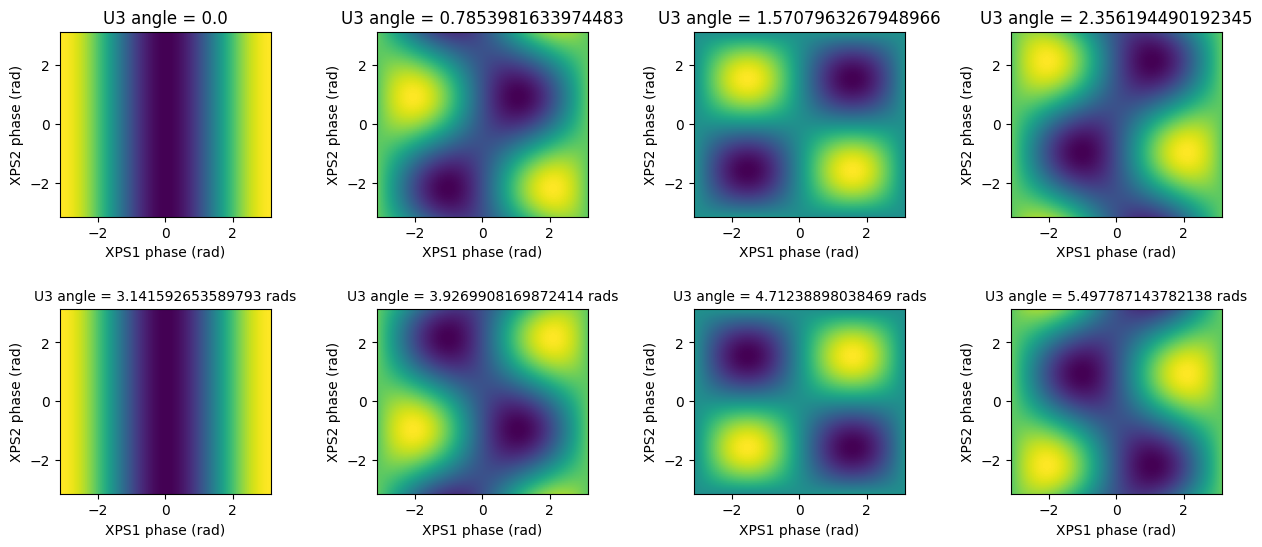

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D

input_te_pow = 1
input_te_angle = 0
input_tm_pow = 0
input_tm_angle = 0

input_te = input_te_pow * (np.cos(input_te_angle) + np.sin(input_te_angle) * 1j)
input_tm = input_tm_pow * (np.cos(input_tm_angle) + np.sin(input_tm_angle) * 1j)



theta_u1 = np.array([0, np.pi/4, np.pi/2, 3 * np.pi/4, np.pi, 5*np.pi/4, 6*np.pi/4, 7*np.pi/4])
#theta_u2 = np.array([0, 0,       0,       0,           0,     0,         0,         0])
theta_u2 = np.array([0, np.pi/4, np.pi/2, 3 * np.pi/4, np.pi, 5*np.pi/4, 6*np.pi/4, 7*np.pi/4])
#theta_u3 = np.array([0, 0,       0,       0,           0,     0,         0,         0])
theta_u3 = np.array([0, np.pi/4, np.pi/2, 3 * np.pi/4, np.pi, 5*np.pi/4, 6*np.pi/4, 7*np.pi/4])

ps_range = np.linspace(-np.pi,np.pi,101)

theta = np.stack((theta_u1, theta_u2, theta_u3),1)

uout_te = np.zeros((theta.shape[0], 3), dtype=complex)
uout_tm = np.zeros((theta.shape[0], 3), dtype=complex)

psout_up = np.zeros((theta.shape[0], 2, ps_range.size, ps_range.size), dtype=complex)
psout_down = np.zeros((theta.shape[0], 2, ps_range.size, ps_range.size), dtype=complex)
dcoupout_up = np.zeros((theta.shape[0], 2, ps_range.size, ps_range.size), dtype=complex)
dcoupout_down = np.zeros((theta.shape[0], 2, ps_range.size, ps_range.size), dtype=complex)
det_up = np.zeros((theta.shape[0], ps_range.size, ps_range.size))
det_down = np.zeros((theta.shape[0], ps_range.size, ps_range.size))

for ind0 in range(theta.shape[0]):
    # u1 rotation
    uout_te[ind0, 0] = input_te * np.exp(-1j * theta[ind0, 0] / 2)
    uout_tm[ind0, 0] = input_tm * np.exp(1j * theta[ind0, 0] / 2)
    # u2 rotation
    uout_te[ind0, 1] = uout_te[ind0, 0] * np.cos(theta[ind0, 1] / 2) - uout_tm[ind0, 0] * 1j * np.sin(theta[ind0, 1] / 2)
    uout_tm[ind0, 1] = -uout_te[ind0, 0] * 1j * np.sin(theta[ind0, 1] / 2) + uout_tm[ind0, 0] * np.cos(theta[ind0, 1] / 2)
    # u3 rotation
    uout_te[ind0, 2] = uout_te[ind0, 1] * np.cos(theta[ind0, 2] / 2) - uout_tm[ind0, 1] * np.sin(theta[ind0, 2] / 2)
    uout_tm[ind0, 2] = uout_te[ind0, 1] * np.sin(theta[ind0, 2] / 2) + uout_tm[ind0, 1] * np.cos(theta[ind0, 2] / 2)

        
    for ind1 in range(ps_range.size):
        for ind2 in range(ps_range.size):
            # 1st stage phase shifters
            psout_up[ind0, 0, ind1, ind2] = uout_tm[ind0, 2] * np.exp(1j * np.max((0, ps_range[ind1])))
            psout_down[ind0, 0, ind1, ind2] = uout_te[ind0, 2] * np.exp(1j * np.max((-ps_range[ind1], 0)))
            # 1st stage dcoupler
            dcoupout_up[ind0, 0, ind1, ind2] = 1 / np.sqrt(2) * (psout_up[ind0, 0, ind1, ind2] + 1j * psout_down[ind0, 0, ind1, ind2])
            dcoupout_down[ind0, 0, ind1, ind2] =  1 / np.sqrt(2) * (1j * psout_up[ind0, 0, ind1, ind2] + psout_down[ind0, 0, ind1, ind2])
            # 2nd stage phase shifter
            psout_up[ind0, 1, ind1, ind2] = dcoupout_up[ind0, 0, ind1, ind2] * np.exp(1j * np.max((0, ps_range[ind2])))
            psout_down[ind0, 1, ind1, ind2] = dcoupout_down[ind0, 0, ind1, ind2] * np.exp(1j * np.max((-ps_range[ind2], 0)))
            # 2nd stage dcoupler
            dcoupout_up[ind0, 1, ind1, ind2] = 1 / np.sqrt(2) * (psout_up[ind0, 1, ind1, ind2] + 1j * psout_down[ind0, 1, ind1, ind2])
            dcoupout_down[ind0, 1, ind1, ind2] =  1 / np.sqrt(2) * (1j * psout_up[ind0, 1, ind1, ind2] + psout_down[ind0, 1, ind1, ind2])

            det_up[ind0, ind1, ind2] = dcoupout_up[ind0, 1, ind1, ind2] * np.conj(dcoupout_up[ind0, 1, ind1, ind2])
            det_down[ind0, ind1, ind2] = dcoupout_down[ind0, 1, ind1, ind2] * np.conj(dcoupout_down[ind0, 1, ind1, ind2])

X, Y = np.meshgrid(ps_range, ps_range)

fig, ax = plt.subplots(2, 4, figsize=(15, 6))
for ind in range(4):
    axplot0 = ax[0,ind].imshow(det_down[ind,0:,0:], cmap='viridis', aspect='auto', origin='lower', extent=[X.min(), X.max(), Y.min(), Y.max()])
    ax[0, ind].set_title(f'U3 angle = {theta_u3[ind]}')
    ax[0, ind].set_xlabel('XPS1 phase (rad)', fontsize = 10)
    ax[0, ind].set_ylabel('XPS2 phase (rad)', fontsize = 10)

    axplot0 = ax[1,ind].imshow(det_down[ind+4,0:,0:], cmap='viridis', aspect='auto', origin='lower', extent=[X.min(), X.max(), Y.min(), Y.max()])
    ax[1, ind].set_title(f'U3 angle = {theta_u3[ind+4]} rads', fontsize = 10)
    ax[1, ind].set_xlabel('XPS1 phase (rad)', fontsize = 10)
    ax[1, ind].set_ylabel('XPS2 phase (rad)', fontsize = 10)

plt.subplots_adjust(wspace=0.5, hspace=0.5)


/var/folders/gd/ldpql9k10fv2bcx8x9khqszc0000gn/T/ipykernel_28241/457911822.py:58: ComplexWarning: Casting complex values to real discards the imaginary part
  det_up[ind0, ind1, ind2] = dcoupout_up[ind0, 1, ind1, ind2] * np.conj(dcoupout_up[ind0, 1, ind1, ind2])
/var/folders/gd/ldpql9k10fv2bcx8x9khqszc0000gn/T/ipykernel_28241/457911822.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  det_down[ind0, ind1, ind2] = dcoupout_down[ind0, 1, ind1, ind2] * np.conj(dcoupout_down[ind0, 1, ind1, ind2])


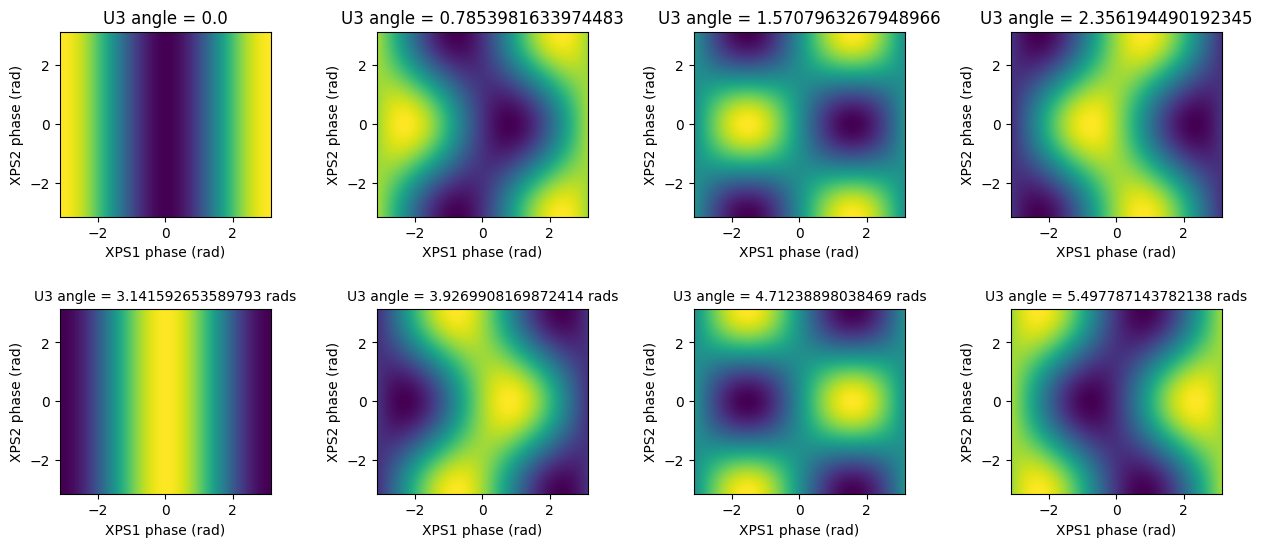

In [5]:
input_te_pow = 1
input_te_angle = 0
input_tm_pow = 0
input_tm_angle = 0

input_te = input_te_pow * (np.cos(input_te_angle) + np.sin(input_te_angle) * 1j)
input_tm = input_tm_pow * (np.cos(input_tm_angle) + np.sin(input_tm_angle) * 1j)



theta_u1 = np.array([0, np.pi/4, np.pi/2, 3 * np.pi/4, np.pi, 5*np.pi/4, 6*np.pi/4, 7*np.pi/4])
theta_u2 = np.array([0, 0,       0,       0,           0,     0,         0,         0])
#theta_u2 = np.array([0, np.pi/4, np.pi/2, 3 * np.pi/4, np.pi, 5*np.pi/4, 6*np.pi/4, 7*np.pi/4])
#theta_u3 = np.array([0, 0,       0,       0,           0,     0,         0,         0])
theta_u3 = np.array([0, np.pi/4, np.pi/2, 3 * np.pi/4, np.pi, 5*np.pi/4, 6*np.pi/4, 7*np.pi/4])

ps_range = np.linspace(-np.pi,np.pi,101)

theta = np.stack((theta_u1, theta_u2, theta_u3),1)

uout_te = np.zeros((theta.shape[0], 3), dtype=complex)
uout_tm = np.zeros((theta.shape[0], 3), dtype=complex)

psout_up = np.zeros((theta.shape[0], 2, ps_range.size, ps_range.size), dtype=complex)
psout_down = np.zeros((theta.shape[0], 2, ps_range.size, ps_range.size), dtype=complex)
dcoupout_up = np.zeros((theta.shape[0], 2, ps_range.size, ps_range.size), dtype=complex)
dcoupout_down = np.zeros((theta.shape[0], 2, ps_range.size, ps_range.size), dtype=complex)
det_up = np.zeros((theta.shape[0], ps_range.size, ps_range.size))
det_down = np.zeros((theta.shape[0], ps_range.size, ps_range.size))

for ind0 in range(theta.shape[0]):
    # u1 rotation
    uout_te[ind0, 0] = input_te * np.exp(-1j * theta[ind0, 0] / 2)
    uout_tm[ind0, 0] = input_tm * np.exp(1j * theta[ind0, 0] / 2)
    # u2 rotation
    uout_te[ind0, 1] = uout_te[ind0, 0] * np.cos(theta[ind0, 1] / 2) - uout_tm[ind0, 0] * 1j * np.sin(theta[ind0, 1] / 2)
    uout_tm[ind0, 1] = -uout_te[ind0, 0] * 1j * np.sin(theta[ind0, 1] / 2) + uout_tm[ind0, 0] * np.cos(theta[ind0, 1] / 2)
    # u3 rotation
    uout_te[ind0, 2] = uout_te[ind0, 1] * np.cos(theta[ind0, 2] / 2) - uout_tm[ind0, 1] * np.sin(theta[ind0, 2] / 2)
    uout_tm[ind0, 2] = uout_te[ind0, 1] * np.sin(theta[ind0, 2] / 2) + uout_tm[ind0, 1] * np.cos(theta[ind0, 2] / 2)

        
    for ind1 in range(ps_range.size):
        for ind2 in range(ps_range.size):
            # 1st stage phase shifters
            psout_up[ind0, 0, ind1, ind2] = uout_tm[ind0, 2] * np.exp(1j * np.max((0, ps_range[ind1])))
            psout_down[ind0, 0, ind1, ind2] = uout_te[ind0, 2] * np.exp(1j * np.max((-ps_range[ind1], 0)))
            # 1st stage dcoupler
            dcoupout_up[ind0, 0, ind1, ind2] = 1 / np.sqrt(2) * (psout_up[ind0, 0, ind1, ind2] + 1j * psout_down[ind0, 0, ind1, ind2])
            dcoupout_down[ind0, 0, ind1, ind2] =  1 / np.sqrt(2) * (1j * psout_up[ind0, 0, ind1, ind2] + psout_down[ind0, 0, ind1, ind2])
            # 2nd stage phase shifter
            psout_up[ind0, 1, ind1, ind2] = dcoupout_up[ind0, 0, ind1, ind2] * np.exp(1j * np.max((0, ps_range[ind2])))
            psout_down[ind0, 1, ind1, ind2] = dcoupout_down[ind0, 0, ind1, ind2] * np.exp(1j * np.max((-ps_range[ind2], 0)))
            # 2nd stage dcoupler
            dcoupout_up[ind0, 1, ind1, ind2] = 1 / np.sqrt(2) * (psout_up[ind0, 1, ind1, ind2] + 1j * psout_down[ind0, 1, ind1, ind2])
            dcoupout_down[ind0, 1, ind1, ind2] =  1 / np.sqrt(2) * (1j * psout_up[ind0, 1, ind1, ind2] + psout_down[ind0, 1, ind1, ind2])

            det_up[ind0, ind1, ind2] = dcoupout_up[ind0, 1, ind1, ind2] * np.conj(dcoupout_up[ind0, 1, ind1, ind2])
            det_down[ind0, ind1, ind2] = dcoupout_down[ind0, 1, ind1, ind2] * np.conj(dcoupout_down[ind0, 1, ind1, ind2])

X, Y = np.meshgrid(ps_range, ps_range)

fig, ax = plt.subplots(2, 4, figsize=(15, 6))
for ind in range(4):
    axplot0 = ax[0,ind].imshow(det_down[ind,0:,0:], cmap='viridis', aspect='auto', origin='lower', extent=[X.min(), X.max(), Y.min(), Y.max()])
    ax[0, ind].set_title(f'U3 angle = {theta_u3[ind]}')
    ax[0, ind].set_xlabel('XPS1 phase (rad)', fontsize = 10)
    ax[0, ind].set_ylabel('XPS2 phase (rad)', fontsize = 10)

    axplot0 = ax[1,ind].imshow(det_down[ind+4,0:,0:], cmap='viridis', aspect='auto', origin='lower', extent=[X.min(), X.max(), Y.min(), Y.max()])
    ax[1, ind].set_title(f'U3 angle = {theta_u3[ind+4]} rads', fontsize = 10)
    ax[1, ind].set_xlabel('XPS1 phase (rad)', fontsize = 10)
    ax[1, ind].set_ylabel('XPS2 phase (rad)', fontsize = 10)

plt.subplots_adjust(wspace=0.5, hspace=0.5)

In [6]:
theta.shape


(8, 3)

In [7]:
theta[0,0]

0.0